In [1]:
import pandas as pd

# Load the dataset from the CSV file
df = pd.read_csv('CSO_Projection_PEC26.20250903T140939.csv')

# --- Multiply the VALUE by 1000 ---
# This is the new line to convert thousands to actual numbers
df['VALUE'] = df['VALUE'] * 1000

# --- Data Cleaning and Preparation ---

# Create a temporary numeric column for sorting ages correctly
df['Age_clean'] = df['Age'].str.extract('(\d+)').astype(float)
df.loc[df['Age'] == 'Under 1 year', 'Age_clean'] = 0

# Sort the dataframe by the numeric age column
df = df.sort_values(by='Age_clean')

# Drop the temporary column
df = df.drop(columns=['Age_clean'])


# --- Separate Data by Gender ---

male_df = df[df['Sex'] == 'Male']
female_df = df[df['Sex'] == 'Female']


# --- Reshape the Data (Pivot) ---

male_pivot = male_df.pivot_table(index='Age', columns='Year', values='VALUE')
female_pivot = female_df.pivot_table(index='Age', columns='Year', values='VALUE')


# --- Final Sorting of the Output ---

sorted_age_index = df['Age'].unique()
male_pivot = male_pivot.reindex(sorted_age_index)
female_pivot = female_pivot.reindex(sorted_age_index)


# --- Save to Excel ---

# Save both dataframes to a new Excel file
with pd.ExcelWriter('population_projection_CSO.xlsx') as writer:
    male_pivot.to_excel(writer, sheet_name='Male')
    female_pivot.to_excel(writer, sheet_name='Female')

print("Data cleaning complete. File with full numbers saved as 'population_projection_CSO.xlsx'")

Data cleaning complete. File with full numbers saved as 'population_projection_CSO.xlsx'


In [15]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

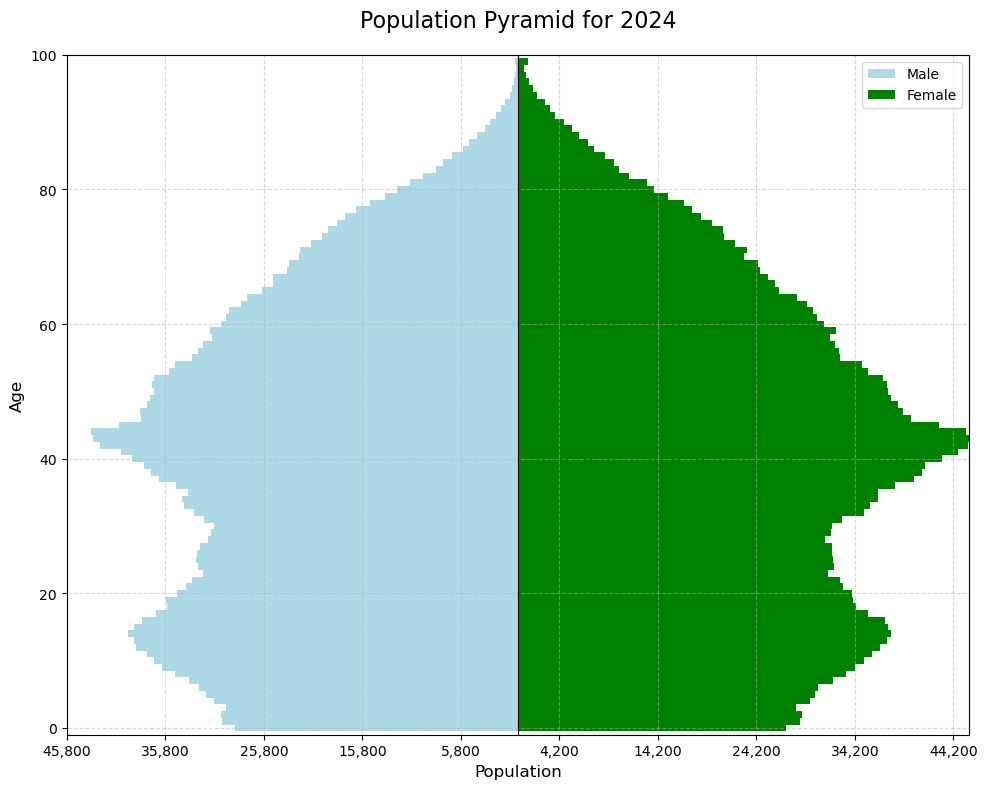

In [29]:
# --- Population Pyramid from Excel (CSO Data) ---

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel file
file_path = "population_projection_CSO.xlsx"
male_df = pd.read_excel(file_path, sheet_name="Male")
female_df = pd.read_excel(file_path, sheet_name="Female")

# --- Process Age column (convert to numeric 0–99) ---
def process_age_column(df):
    ages = []
    for val in df["Age"]:
        if isinstance(val, str) and "Under 1" in val:
            ages.append(0)
        else:
            try:
                ages.append(int(val.split()[0]))
            except:
                ages.append(None)
    df = df.copy()
    df["Age_num"] = ages
    return df.dropna(subset=["Age_num"])

male_df_proc = process_age_column(male_df)
female_df_proc = process_age_column(female_df)

# --- Choose year to plot ---
year = 2024   # change this to 2023, 2024, etc.

ages = male_df_proc["Age_num"].values
male_pop = male_df_proc[year].values
female_pop = female_df_proc[year].values

# --- Plot Population Pyramid ---
fig, ax = plt.subplots(figsize=(10, 8))

ax.barh(ages, -male_pop, color="lightblue", label="Male", height=1.0)
ax.barh(ages, female_pop, color="green", label="Female", height=1.0)

ax.set_title(f"Population Pyramid for {year}", fontsize=16, pad=20)
ax.set_xlabel("Population", fontsize=12)
ax.set_ylabel("Age", fontsize=12)

# Symmetric X-axis ticks
max_pop = max(male_pop.max(), female_pop.max())
tick_interval = 10000
ax.set_xlim(-max_pop, max_pop)
ticks = np.arange(-max_pop, max_pop + 1, tick_interval)
ax.set_xticks(ticks)
ax.set_xticklabels([f"{abs(int(t)):,}" for t in ticks])

ax.set_ylim(-1, 100)  # Ages 0–99
ax.legend()
ax.grid(True, linestyle="--", alpha=0.5)
ax.axvline(0, color="black", linewidth=0.8)

plt.tight_layout()
plt.show()


In [33]:
# --- Animated Population Pyramid from Excel (CSO Data) ---

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ----------------------------
# Load Excel file
file_path = "population_projection_CSO.xlsx"
male_df = pd.read_excel(file_path, sheet_name="Male")
female_df = pd.read_excel(file_path, sheet_name="Female")

# --- Process Age column (convert to numeric 0–99) ---
def process_age_column(df):
    ages = []
    for val in df["Age"]:
        if isinstance(val, str) and "Under 1" in val:
            ages.append(0)
        else:
            try:
                ages.append(int(val.split()[0]))
            except:
                ages.append(None)
    df = df.copy()
    df["Age_num"] = ages
    return df.dropna(subset=["Age_num"])

male_df_proc = process_age_column(male_df)
female_df_proc = process_age_column(female_df)

ages = male_df_proc["Age_num"].values
plot_years = list(range(2022, 2031))  # 2022–2030

# ----------------------------
# Animation setup
fig, ax = plt.subplots(figsize=(10, 8))

def animate(year):
    ax.clear()

    male_pop = male_df_proc[year].values
    female_pop = female_df_proc[year].values

    ax.barh(ages, -male_pop, color="lightblue", label="Male", height=1.0)
    ax.barh(ages, female_pop, color="green", label="Female", height=1.0)

    # Titles and labels
    ax.set_title(f"Population Pyramid for {year}", fontsize=16, pad=20)
    ax.set_xlabel("Population", fontsize=12)
    ax.set_ylabel("Age", fontsize=12)

    # Symmetric X-axis
    max_pop = max(male_pop.max(), female_pop.max())
    tick_interval = 10000
    ax.set_xlim(-max_pop, max_pop)
    ticks = np.arange(-max_pop, max_pop + 1, tick_interval)
    ax.set_xticks(ticks)
    ax.set_xticklabels([f"{abs(int(t)):,}" for t in ticks])

    ax.set_ylim(-1, 100)
    ax.legend()
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.axvline(0, color="black", linewidth=0.8)

# ----------------------------
# Create animation
ani = animation.FuncAnimation(
    fig, animate, frames=plot_years, interval=1200, repeat=True
)

# Save output
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)
pyramid_path = os.path.join(output_dir, "Population_Pyramid_Animation_CSO.gif")

ani.save(pyramid_path, writer="pillow", fps=1)
plt.close(fig)

print(f"Animated population pyramid saved to {pyramid_path}")


Animated population pyramid saved to output\Population_Pyramid_Animation_CSO.gif
